鈴木讓「統計的機械学習の数理 with Python 100問」(共立出版)

# 第6章 非線形回帰

## 6.1 多項式回帰

In [1]:
! pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn

In [3]:
# Anacondaの場合は下記( import japanize_matplotlib はコメントアウト)
import matplotlib
from matplotlib import font_manager
matplotlib.rc("font", family="BIZ UDGothic")

In [4]:
# 多項式回帰
n = 100
x = randn(n)
y = np.sin(x) + randn(n)
m = 3
p_set = [3, 5, 7]
col_set = ["red", "blue", "green"]

In [5]:
def g(beta, u):
    s = 0
    for j in range(len(beta)):  # betaの長さでループ
        s += beta[j] * u ** j
    return s

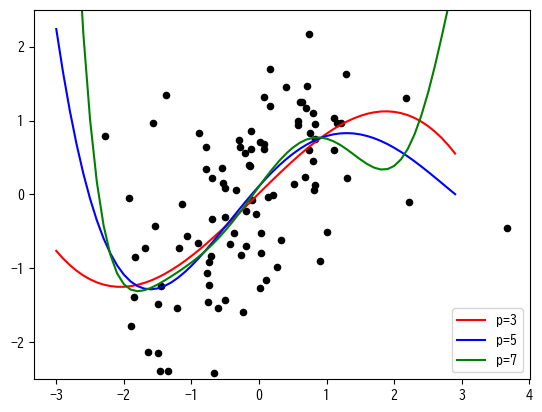

In [6]:
x_seq = np.arange(-3, 3, 0.1)
plt.scatter(x, y, s=20, c="black")
plt.ylim(-2.5, 2.5)

for i in range(m):
    p = p_set[i]
    X = np.ones([n, 1])
    for j in range(1, p + 1):
        xx = np.array(x ** j).reshape((n, 1))
        X = np.hstack((X, xx))
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    plt.plot(x_seq, g(beta, x_seq), c=col_set[i], label=f"p={p}")

plt.legend(loc="lower right")

In [7]:
# 偶関数に近いデータの生成
n = 100
x = randn(n) * np.pi
y = np.round(x) % 2 * 2 - 1 + randn(n) * 0.2

In [8]:
def f(x, g):
    return beta[0] + beta[1] * g(x) + beta[2] * g(2 * x) + beta[3] * g(3 * x)

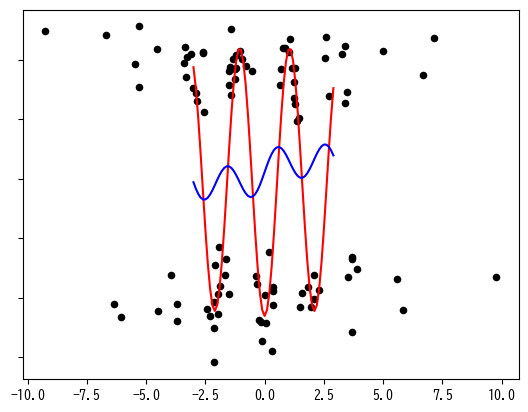

In [9]:
plt.scatter(x, y, s=20, c="black")
plt.tick_params(labelleft=False)

# 1, cosx, cos2x, cos3xを基底に選ぶ
X = np.ones([n, 1])
for j in range(1, 4):
    xx = np.array(np.cos(j * x)).reshape((n, 1))
    X = np.hstack((X, xx))
beta = np.linalg.inv(X.T @ X) @ X.T @ y
plt.plot(x_seq, f(x_seq, np.cos), c="red")

# 1, sinx, sin2x, sin3xを基底に選ぶ
X = np.ones([n, 1])
for j in range(1, 4):
    xx = np.array(np.sin(j * x)).reshape((n, 1))
    X = np.hstack((X, xx))
beta = np.linalg.inv(X.T @ X) @ X.T @ y
plt.plot(x_seq, f(x_seq, np.sin), c="blue")

## 6.2 スプライン回帰

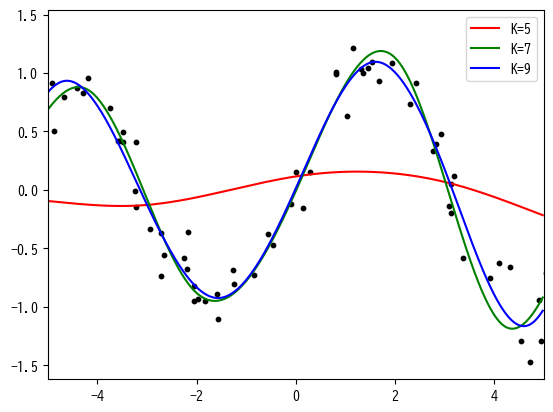

In [10]:
n = 100
x = randn(n) * 2 * np.pi
y = np.sin(x) + 0.2 * randn(n)
col_set = ["red", "green", "blue"]
k_set = [5, 7, 9]

plt.scatter(x, y, c="black", s=10)
plt.xlim(-5, 5)

for k in range(3):
    K = k_set[k]
    knots = np.linspace(-2 * np.pi, 2 * np.pi, K)
    X = np.zeros((n, K + 4))

    for i in range(n):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = x[i] ** 2
        X[i, 3] = x[i] ** 3
        for j in range(K):
            X[i, j + 4] = np.maximum((x[i] - knots[j]) ** 3, 0)

    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def f(x):
        s = beta[0] + beta[1] * x + beta[2] * x ** 2 + beta[3] * x ** 3
        for j in range(K):
            s += beta[j + 4] * np.maximum((x - knots[j]) ** 3, 0)
        return s

    u_seq = np.arange(-5, 5, 0.02)
    v_seq = [f(u) for u in u_seq]

    plt.plot(u_seq, v_seq, c=col_set[k], label=f"K={K}")

plt.legend()

## 6.3 自然なスプライン

In [11]:
def d(j, x, knots):
    K = len(knots)
    return (np.maximum((x - knots[j]) ** 3, 0) - np.maximum((x - knots[K - 1]) ** 3, 0)) / (knots[K - 1] - knots[j])

In [12]:
def h(j, x, knots):
    K = len(knots)
    if j == 0:
        return 1
    elif j == 1:
        return x
    else:
        return d(j - 2, x, knots) - d(K - 2, x, knots)

K=6

In [13]:
n = 100
x = randn(n) * 2 * np.pi
y = np.sin(x) + 0.2 * randn(n)
K = 6
#  K = 11
knots = np.linspace(-5, 5, K)
X = np.zeros((n, K + 4))

for i in range(n):
    X[i, 0] = 1
    X[i, 1] = x[i]
    X[i, 2] = x[i] ** 2
    X[i, 3] = x[i] ** 3
    for j in range(K):
        X[i, j + 4] = np.maximum((x[i] - knots[j]) ** 3, 0)

beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [14]:
def f(x):
    S = beta[0] + beta[1] * x + beta[2] * x ** 2 + beta[3] * x ** 3
    for j in range(K):
        S += beta[j + 4] * np.maximum((x - knots[j]) ** 3, 0)
    return S

In [15]:
X = np.zeros((n, K))
X[:, 0] = 1
for j in range(1, K):
    for i in range(n):
        X[i, j] = h(j, x[i], knots)

gamma = np.linalg.inv(X.T @ X) @ X.T @ y

In [16]:
def g(x):
    S = gamma[0]
    for j in range(1, K):
        S += gamma[j] * h(j, x, knots)
    return S

In [17]:
u_seq = np.arange(-6, 6, 0.02)
v_seq = [f(u) for u in u_seq]
w_seq = [g(u) for u in u_seq]

plt.scatter(x, y, c="black", s=10)
plt.xlim(-6, 6)
plt.xlabel("x")
plt.ylabel("f(x), g(x)")
plt.tick_params(labelleft=False)
plt.plot(u_seq, v_seq, c="blue", label="スプライン")
plt.plot(u_seq, w_seq, c="red", label="自然なスプライン")
plt.vlines(x=[-5, 5], ymin=-1.5, ymax=1.5, linewidth=1)
plt.vlines(x=knots, ymin=-1.5, ymax=1.5, linewidth=0.5, linestyle="dashed")
plt.legend()

## 6.4 平滑化スプライン

In [18]:
def g_matrix(x):
    n = len(x)
    g = np.zeros((n, n))
    for i in range(2, n):
        for j in range(i, n):
            numer1 = ((x[n - 2] - x[j - 2]) ** 2) * (12 * x[n - 2] + 6 * x[j - 2] - 18 * x[i - 2])
            numer2 = 12 * (x[n - 2] - x[i - 2]) * (x[n - 2] - x[j - 2]) * (x[n - 1] - x[n - 2])
            denom = (x[n - 1] - x[i - 2]) * (x[n - 1] - x[j - 2])
            g[i, j] = (numer1 + numer2) / denom
            g[j, i] = g[i, j]
    return g

In [19]:
n = 100
a, b = -5, 5
x = (b - a) * np.random.rand(n) + a  # (-5,5)の一様分布
y = x + np.sin(x) * 2 + randn(n)
plt.scatter(x, y, c="black", s=10)

index = np.argsort(x)
x = x[index]
y = y[index]
X = np.zeros((n, n))
X[:, 0] = 1
for j in range(1, n):
    for i in range(n):
        X[i, j] = h(j, x[i], x)
GG = g_matrix(x)
lambda_set = [1, 30, 80]
col_set = ["red", "blue", "green"]
plt.scatter(x, y, c="black", s=10)
plt.title("平滑化スプライン(n=100)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.tick_params(labelleft=False)
for i, lam in enumerate(lambda_set):
    gamma = np.linalg.inv(X.T @ X + lam * GG) @ X.T @ y

    def g(u):
        S = gamma[0]
        for j in range(1, n):
            S += gamma[j] * h(j, u, x)
        return S

    u_seq = np.arange(-8, 8, 0.02)
    v_seq = [g(u) for u in u_seq]
    plt.plot(u_seq, v_seq, c=col_set[i], label=f"λ={lambda_set[i]}")
plt.legend()

In [20]:
def cv_ss_fast(X, y, lam, G, k):
    n = len(y)
    m = int(n / k)
    H = X @ np.linalg.inv(X.T @ X + lam * G) @ X.T
    df = np.sum(np.diag(H))
    I_n = np.eye(n)
    e = (I_n - H) @ y
    I_m = np.eye(m)
    S = 0
    for j in range(k):
        test = np.arange(j * m, (j + 1) * m)
        S += (np.linalg.inv(I_m - H[test, :][:, test]) @ e[test]).T @ (np.linalg.inv(I_m - H[test, :][:, test]) @ e[test])
    return {'score': S / n, 'df': df}

Text(0.5, 1.0, '有効自由度とCVによる予測誤差')

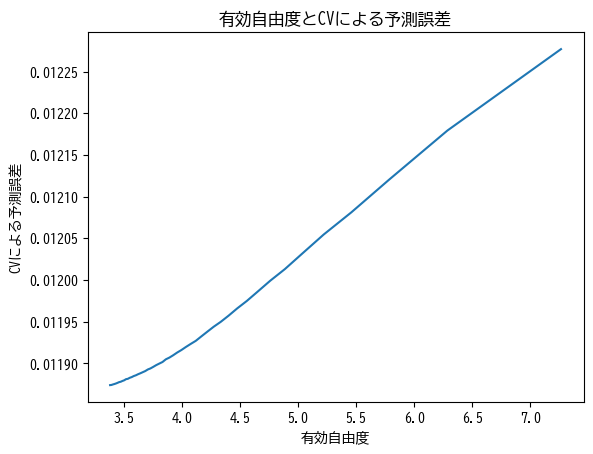

In [21]:
n = 100
a = -5
b = 5
# (-5,5)の一様分布からデータを生成
x = (b - a) * np.random.rand(n) + a
y = x - 0.02 * np.sin(x) - 0.1 * np.random.randn(n)
# xに基づいてデータをソート
index = np.argsort(x)
x = x[index]
y = y[index]

X = np.zeros((n, n))
X[:, 0] = 1
for j in range(1, n):
    for i in range(n):
        X[i, j] = h(j, x[i], x)
GG = g_matrix(x)
v = []
w = []
for lam in range(1, 51):
    res = cv_ss_fast(X, y, lam, GG, n)
    v.append(res['df'])
    w.append(res['score'])

plt.plot(v, w)
plt.xlabel("有効自由度")
plt.ylabel("CVによる予測誤差")
plt.title("有効自由度とCVによる予測誤差")


## 6.5 局所回帰

In [22]:
n = 250
x = 2 * np.random.randn(n)
y = np.sin(2 * np.pi * x) + np.random.randn(n) / 4

In [23]:
def D(t):
    return np.maximum(0.75 * (1 - t ** 2), 0)

In [24]:
def K(x, y, lam):
    return D(np.abs(x - y) / lam)

In [25]:
def f(z, lam):
    S = 0
    T = 0
    for i in range(n):
        S += K(x[i], z, lam) * y[i]
        T += K(x[i], z, lam)
    return S / T if T else 0

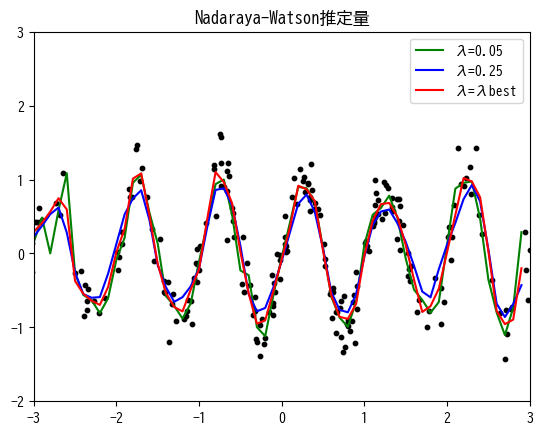

In [26]:
plt.scatter(x, y, c="black", s=10)
plt.xlim(-3, 3)
plt.ylim(-2, 3)

xx = np.arange(-3, 3, 0.1)
yy = [f(zz, 0.05) for zz in xx]
plt.plot(xx, yy, c="green", label="λ=0.05")

yy = [f(zz, 0.25) for zz in xx]
plt.plot(xx, yy, c="blue", label="λ=0.25")

m = int(n / 10)
lambda_seq = np.arange(0.05, 1, 0.01)
SS_min = np.inf
for lam in lambda_seq:
    SS = 0
    for k in range(10):
        test = list(range(k * m, (k + 1) * m))
        train = list(set(range(n)) - set(test))
        for j in test:
            u = sum(K(x[i], x[j], lam) * y[i] for i in train)
            v = sum(K(x[i], x[j], lam) for i in train)
            z = y[min(train, key=lambda i: np.abs(x[j] - x[i]))] if v == 0 else u / v
            SS += (y[j] - z) ** 2
    if SS < SS_min:
        SS_min, lambda_best = SS, lam

yy = [f(zz, lambda_best) for zz in xx]
plt.plot(xx, yy, c="red", label="λ=λbest")
plt.title("Nadaraya-Watson推定量")
plt.legend()

In [27]:
def local(x, y, z=None):
    if z is None:
        z = x
    n = len(y)
    x = x.reshape(-1, 1)
    X = np.insert(x, 0, 1, axis=1)
    yy = []
    for u in z:
        w = np.zeros(n)
        for i in range(n):
            w[i] = K(x[i], u, lam=1)
        W = np.diag(w)
        beta_hat = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        yy.append(beta_hat[0] + beta_hat[1] * u)
    return yy

Text(0.5, 1.0, '局所線形回帰(p=1,N=30)')

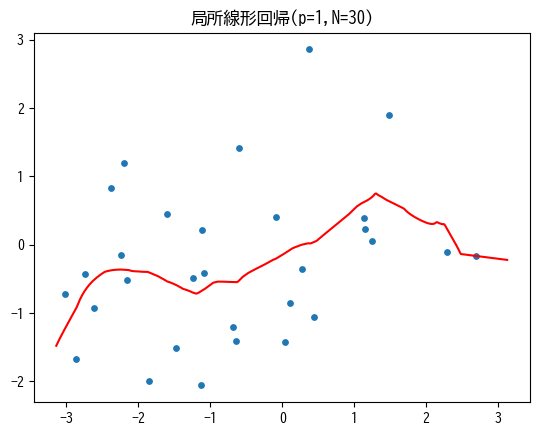

In [28]:
n = 30
x = np.random.rand(n) * 2 * np.pi - np.pi
y = np.sin(x) + np.random.randn(n)
plt.scatter(x, y, s=15)
m = 200
U = np.arange(-np.pi, np.pi, np.pi / m)
V = local(x, y, U)
plt.plot(U, V, c="red")
plt.title("局所線形回帰(p=1,N=30)")

## 6.6 一般化加法モデル

In [29]:
def poly(x, y, z=None):
    if z is None:
        z = x
    n = len(x)
    m = len(z)
    X = np.zeros((n, 4))
    for i in range(n):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = x[i] ** 2
        X[i, 3] = x[i] ** 3
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    Z = np.zeros((m, 4))
    for j in range(m):
        Z[j, 0] = 1
        Z[j, 1] = z[j]
        Z[j, 2] = z[j] ** 2
        Z[j, 3] = z[j] ** 3
    yy = Z @ beta_hat
    return yy

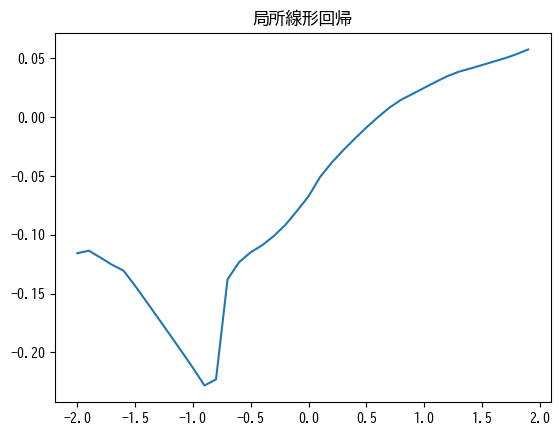

In [30]:
n = 30
x = np.random.rand(n) * 2 * np.pi - np.pi
x = x.reshape(-1, 1)
y = np.sin(x) + np.random.randn(1)
y_1 = 0
y_2 = 0
for k in range(10):
    y_1 = poly(x, y - y_2)
    y_2 = local(x, y - y_1, z=x)

z = np.arange(-2, 2, 0.1)
plt.plot(z, poly(x, y_1, z))
plt.title("多項式回帰(3次)")
plt.show()

plt.plot(z, local(x, y_2, z))
plt.title("局所線形回帰")
plt.show()
